# EDA Analysis & joining the data

I'll be building the db while analysing the results. Idea - combine the columns we are goint to use for the regression etc.

In [154]:
import pandas as pd
import ast


bg = pd.read_csv("data/board-game.csv")
ids_and_price = pd.read_csv("data/price.csv")
ratings = pd.read_csv("data/rating.csv")

df = pd.concat([ids_and_price, bg], axis=1)

# I don't think we need these..
df = df.drop(['rank', 'owned', 'trading', 'wanting', 'wishing', 'num_comments', 'num_weights', 'avg_weight'], axis=1)
print()
print(df.columns)


Index(['id', 'price', 'Name', 'Year', 'min_players', 'max_players',
       'min_playtime', 'max_playtime', 'min_age', 'category', 'mechanic',
       'userrated', 'avg_rate'],
      dtype='object')


In [155]:
# reorder columns
order = ['id', 'Name', 'Year', 'min_players', 'max_players', 'min_playtime', 'max_playtime', 'min_age', 'category', 'mechanic', 'userrated', 'avg_rate', 'price']
df = df[order]
print(df.columns)

Index(['id', 'Name', 'Year', 'min_players', 'max_players', 'min_playtime',
       'max_playtime', 'min_age', 'category', 'mechanic', 'userrated',
       'avg_rate', 'price'],
      dtype='object')


## RATING


In [176]:
print("Rating distribution:")
print(f"min avg_rate: {df['avg_rate'].min()}")
print(f"max avg_rate: {df['avg_rate'].max()}")

print(((df.loc[df["avg_rate"]<=6.5]).shape[0])/2000)
print(((df.loc[(df["avg_rate"]>6.5) & (df["avg_rate"]<=7)]).shape[0])/2000)
print(((df.loc[(df["avg_rate"]>7) & (df["avg_rate"]<=7.5)]).shape[0])/2000)
print(((df.loc[(df["avg_rate"]>7.5) & (df["avg_rate"]<=8)]).shape[0])/2000)
print(((df.loc[(df["avg_rate"]>8.5) & (df["avg_rate"]<=9)]).shape[0])/2000)
print(((df.loc[(df["avg_rate"]>9)]).shape[0])/2000)



Rating distribution:
min avg_rate: 6.37986
max avg_rate: 9.16242
0.0065
0.208
0.4175
0.276
0.015
0.001


#### FINDINGS
* Worst average is 6.38 and best 9.16..
* 60% of averages fall between 6.5 and 7.5.. could have hoped for a wider span...
* Did you have some great idea to use the grade distributions here...?

## YEAR

In [156]:
year_distribution = df["Year"].value_counts()

# This will allow terminal to print all rows
pd.options.display.max_rows = None

print("Year distribution:")
print(year_distribution)

Year distribution:
 2019    164
 2017    161
 2018    149
 2015    136
 2016    131
 2020    125
 2021    120
 2014    106
 2022    101
 2012     83
 2013     83
 2011     77
 2010     65
 2009     58
 2008     48
 2007     44
 2004     41
 2005     41
 2006     29
 2003     21
 1999     20
 2000     19
 2023     18
 1995     15
 2002     15
 2001     13
 1997     11
 1998     10
 1994      8
 1996      7
 1986      6
 1983      5
 1990      5
 1992      4
 1977      4
 1985      4
 1982      4
 1993      3
 1980      3
 1991      3
 1981      3
 1989      3
 1979      3
 1974      3
 1988      2
 0         2
 1987      2
 1876      1
 1971      1
 1962      1
 1475      1
 1964      1
 1848      1
 1978      1
 1925      1
 1810      1
 762       1
 1903      1
 1800      1
-2200      1
 1960      1
 1984      1
 1630      1
 1973      1
 1635      1
 1587      1
 1959      1
 1850      1
 1938      1
Name: Year, dtype: int64


####  FINDING
* Interesting years: -2200, 762, , -1, 0 - Are these valid? Theoretically possible, lets see :)


In [157]:
weird_years = df.loc[df["Year"] < 1000]
print(weird_years[["Name", "Year"]])

                  Name  Year
429                 Go -2200
601             Carrom     0
1184           Xiangqi   762
1820  Eat Poop You Cat     0


* Ok, the first three are valid but what about "eat poop you cat"? :)

In [158]:
print(df.loc[df["Name"] == "Eat Poop You Cat"])

         id              Name  Year  min_players  max_players  min_playtime  \
1820  30618  Eat Poop You Cat     0            3           99            20   

      max_playtime  min_age                 category              mechanic  \
1820            20        0  ['Humor', 'Party Game']  ['Paper-and-Pencil']   

      userrated  avg_rate price  
1820       1681   7.46654    -1  


* ok, year might be wrong, but it is only one data point. Might not require cleaning.
* But the years could be categorized if we wanted to..

In [194]:
print(df.loc[df["Year"] < 1925].shape[0])
print(df.loc[df["Year"] < 1995].shape[0])
print(df.loc[df["Year"] < 2000].shape[0])

14
89
152


## YEAR AND RATING

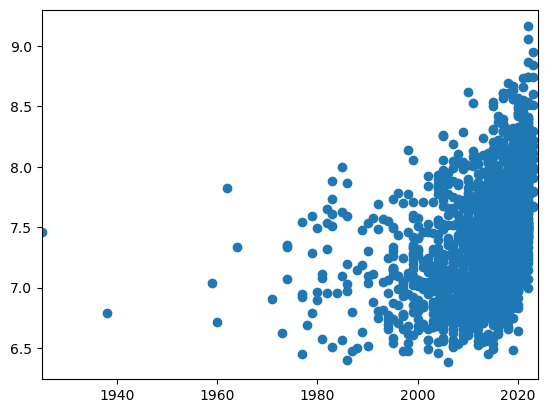

In [193]:
import matplotlib.pyplot as plt


plt.scatter(df["Year"], df["avg_rate"])
plt.xlim(1925,2024)
plt.show()

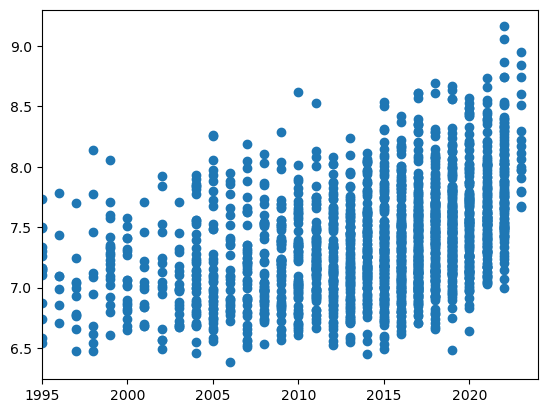

In [195]:
plt.scatter(df["Year"], df["avg_rate"])
plt.xlim(1995,2024)
plt.show()

#### FINDINGS
* It would seem that newer board games get better reviews.. :)
* So if we don't design the games in the past, they are better :)
* People have just gotten better in designing games...

## NUMBER OF PLAYERS

In [159]:
# min players
value_distribution_min = df["min_players"].value_counts(normalize=True) * 100
print("Min distribution:")
print(value_distribution_min)

Min distribution:
2    58.05
1    31.35
3     8.50
4     1.55
5     0.40
6     0.10
8     0.05
Name: min_players, dtype: float64


#### FINDING: 
* Nearly every third game can be played alone 

In [160]:
# max players"
value_distribution_max = df["max_players"].value_counts(normalize=True) * 100
print("Max distribution:")
print(value_distribution_max)

Max distribution:
4      43.95
5      21.10
2      11.95
6      11.90
8       3.75
7       1.90
3       1.20
1       1.10
10      1.10
12      0.55
18      0.25
9       0.25
99      0.25
100     0.20
20      0.15
16      0.15
30      0.05
50      0.05
68      0.05
11      0.05
13      0.05
Name: max_players, dtype: float64


#### FINDINGS: 
* ~ 40% can be played by more than 5 player, ~ 20% by more than 6 players..
* This could be used better in the final analysis, if divided into several columns: you can play alone, with 2, 3, 4, 5, 6 or more. -> "Play_alone", "2_players", "3_players", "4_players", "5_players", "6_or_more"

In [161]:
# New columns = you can play alone, with 2, 3, 4, 5, 6 or more. "Play_alone", "2_players", "3_players", "4_players", "5_players", "6_or_more"
df['Play_alone'] = df.apply(lambda row: 1 if (row['min_players'] <= 1) else 0, axis=1)
df['2_players'] = df.apply(lambda row: 1 if (row['min_players'] <= 2) and (row['max_players'] >= 2) else 0, axis=1)
df['3_players'] = df.apply(lambda row: 1 if (row['min_players'] <= 3) and (row['max_players'] >= 3) else 0, axis=1)
df['4_players'] = df.apply(lambda row: 1 if (row['min_players'] <= 4) and (row['max_players'] >= 4) else 0, axis=1)
df['5_players'] = df.apply(lambda row: 1 if (row['min_players'] <= 5) and (row['max_players'] >= 5) else 0, axis=1)
df['6_or_more'] = df.apply(lambda row: 1 if (row['min_players'] <= 6) and (row['max_players'] >= 6) else 0, axis=1)
print("Percentages:")
print(f'Can be played alone: {df["Play_alone"].sum() / 2000 * 100}')
print(f'Can be played by 2 players: {df["2_players"].sum() / 2000 * 100}')
print(f'Can be played by 3 players: {df["3_players"].sum() / 2000 * 100}')
print(f'Can be played by 4 players: {df["4_players"].sum() / 2000 * 100}')
print(f'Can be played by 5 players: {df["5_players"].sum() / 2000 * 100}')
print(f'Can be played by 6 or more players: {df["6_or_more"].sum() / 2000 * 100}')
print()


Percentages:
Can be played alone: 31.35
Can be played by 2 players: 88.3
Can be played by 3 players: 84.85000000000001
Can be played by 4 players: 85.2
Can be played by 5 players: 41.65
Can be played by 6 or more players: 20.65



#### FINDINGS: 
* Clear majority of games can be played by 2-4 persons. 
* There could be some interesting findigs / differences when it comes to games that can be played alone or by more than 5 players..

## NR OF PLAYERS AND RANKING

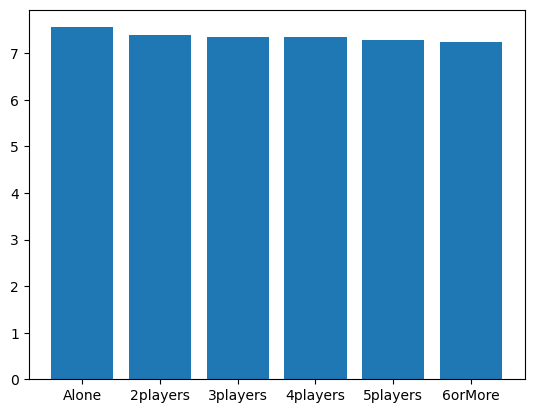

[7.56058909090909, 7.386809694224236, 7.356208532704773, 7.34894257629108, 7.29106350540216, 7.253268765133171]


In [216]:
# How to do this smarten than this? We would need it when we do the same to the categories....

player_cat = ["Alone", "2players", "3players", "4players", "5players", "6orMore"]
player_averages = []

player_averages.append(df.loc[df["Play_alone"] == 1]["avg_rate"].mean())
player_averages.append(df.loc[df["2_players"] == 1]["avg_rate"].mean())
player_averages.append(df.loc[df["3_players"] == 1]["avg_rate"].mean())
player_averages.append(df.loc[df["4_players"] == 1]["avg_rate"].mean())
player_averages.append(df.loc[df["5_players"] == 1]["avg_rate"].mean())
player_averages.append(df.loc[df["6_or_more"] == 1]["avg_rate"].mean())


plt.bar(player_cat, player_averages)
plt.show()

# no point really to draw pictures..

print(player_averages)


#### FINDIGNS
* Seems that games that you can play alone are the most liked ones..

## PLAYTIME

In [162]:
min_time_dist = df["min_playtime"].value_counts(normalize=True) * 100
print("Min playtime distribution:")
print(min_time_dist)

Min playtime distribution:
60     22.10
30     21.00
45     14.60
90      9.00
20      8.15
120     6.30
15      4.90
180     2.60
40      2.55
75      1.65
10      1.25
25      1.00
360     0.70
240     0.65
5       0.65
50      0.55
150     0.30
80      0.30
35      0.30
100     0.20
0       0.15
300     0.15
135     0.15
210     0.10
70      0.10
420     0.10
480     0.05
16      0.05
105     0.05
42      0.05
7       0.05
1       0.05
110     0.05
720     0.05
2       0.05
8       0.05
Name: min_playtime, dtype: float64


* Crap. no nice "division" here...


In [163]:
print(((df.loc[df["min_playtime"]<=10]).shape[0])/2000)
print(((df.loc[(df["min_playtime"]>10) & (df["min_playtime"]<=20)]).shape[0])/2000)
print(((df.loc[(df["min_playtime"]>20) & (df["min_playtime"]<=30)]).shape[0])/2000)
print(((df.loc[(df["min_playtime"]>30) & (df["min_playtime"]<=40)]).shape[0])/2000)
print(((df.loc[(df["min_playtime"]>40) & (df["min_playtime"]<=50)]).shape[0])/2000)
print(((df.loc[(df["min_playtime"]>50) & (df["min_playtime"]<=60)]).shape[0])/2000)
print(((df.loc[(df["min_playtime"]>60) & (df["min_playtime"]<=90)]).shape[0])/2000)
print(((df.loc[(df["min_playtime"]>90) & (df["min_playtime"]<=120)]).shape[0])/2000)
print(((df.loc[(df["min_playtime"]>120) & (df["min_playtime"]<=180)]).shape[0])/2000)
print(((df.loc[(df["min_playtime"]>180)]).shape[0])/2000)


0.0225
0.131
0.22
0.0285
0.152
0.221
0.1105
0.066
0.0305
0.018


* ok, lets fix these a bit..

In [211]:
print(((df.loc[df["min_playtime"]<=20]).shape[0])/2000)
print(((df.loc[(df["min_playtime"]>20) & (df["min_playtime"]<=30)]).shape[0])/2000)
print(((df.loc[(df["min_playtime"]>30) & (df["min_playtime"]<=40)]).shape[0])/2000)
print(((df.loc[(df["min_playtime"]>40) & (df["min_playtime"]<=50)]).shape[0])/2000)
print(((df.loc[(df["min_playtime"]>50) & (df["min_playtime"]<=60)]).shape[0])/2000)
print(((df.loc[(df["min_playtime"]>60)]).shape[0])/2000)

0.1535
0.22
0.0285
0.152
0.221
0.225


* Ok, this could be an evaluation criteria... I'll add a column with these categories. 


In [214]:
# help function to get the right value
def get_mintime_category(row):
    if row["min_playtime"] <= 20:
        return "<=20min"
    elif 20 < row["min_playtime"] <= 30:
        return "20-30min"
    elif 30 < row["min_playtime"] <= 40:
        return "30-50min"
    elif 40 < row["min_playtime"] <= 50:
        return "40-50min"
    elif 50 < row["min_playtime"] <= 60:
        return "50-60min"
    else:
        return ">60min"
    
df["min_playtime_category"] = df.apply(get_mintime_category, axis=1)

mintime_groups = df.groupby("min_playtime_category")
mintime_groups_avgrates = mintime_groups["avg_rate"].mean()

print(mintime_groups_avgrates)

min_playtime_category
20-30min    7.247506
30-50min    7.390100
40-50min    7.310112
50-60min    7.468100
<=20min     7.179288
>60min      7.567949
Name: avg_rate, dtype: float64


#### FINDINGS
* The longer the game lasts to begin with the better!
* And then the same with max values...

In [165]:
max_time_dist = df["max_playtime"].value_counts(normalize=True) * 100
print("Max playtime distribution:")
print(max_time_dist)

Max playtime distribution:
60       17.95
90       13.55
120      12.80
30       12.10
45       11.55
180       4.95
20        4.65
40        3.00
75        2.85
240       2.70
150       2.50
15        2.45
360       1.25
100       0.95
25        0.85
80        0.80
10        0.65
50        0.60
300       0.60
70        0.30
35        0.30
200       0.25
480       0.25
210       0.20
720       0.15
140       0.15
0         0.15
125       0.15
135       0.15
1000      0.10
900       0.10
270       0.10
420       0.10
1200      0.10
540       0.05
105       0.05
6000      0.05
32        0.05
999       0.05
42        0.05
110       0.05
160       0.05
5         0.05
165       0.05
115       0.05
2         0.05
12000     0.05
3000      0.05
Name: max_playtime, dtype: float64


* zeros are not valid...
* And if we take the average, it might not tell the relevant info... so I'll classify these too..

In [166]:
print(((df.loc[df["max_playtime"]<=10]).shape[0])/2000)
print(((df.loc[(df["max_playtime"]>10) & (df["max_playtime"]<=20)]).shape[0])/2000)
print(((df.loc[(df["max_playtime"]>20) & (df["max_playtime"]<=30)]).shape[0])/2000)
print(((df.loc[(df["max_playtime"]>30) & (df["max_playtime"]<=40)]).shape[0])/2000)
print(((df.loc[(df["max_playtime"]>40) & (df["max_playtime"]<=50)]).shape[0])/2000)
print(((df.loc[(df["max_playtime"]>50) & (df["max_playtime"]<=60)]).shape[0])/2000)
print(((df.loc[(df["max_playtime"]>60) & (df["max_playtime"]<=90)]).shape[0])/2000)
print(((df.loc[(df["max_playtime"]>90) & (df["max_playtime"]<=120)]).shape[0])/2000)
print(((df.loc[(df["max_playtime"]>120) & (df["max_playtime"]<=180)]).shape[0])/2000)
print(((df.loc[(df["max_playtime"]>180)]).shape[0])/2000)

0.009
0.071
0.1295
0.0335
0.122
0.1795
0.175
0.139
0.08
0.0615


* Lets fix the categories..

In [167]:
print(((df.loc[df["max_playtime"]<=20]).shape[0])/2000)
print(((df.loc[(df["max_playtime"]>20) & (df["max_playtime"]<=40)]).shape[0])/2000)
print(((df.loc[(df["max_playtime"]>40) & (df["max_playtime"]<=60)]).shape[0])/2000)
print(((df.loc[(df["max_playtime"]>60) & (df["max_playtime"]<=90)]).shape[0])/2000)
print(((df.loc[(df["max_playtime"]>90) & (df["max_playtime"]<=120)]).shape[0])/2000)
print(((df.loc[(df["max_playtime"]>120)]).shape[0])/2000)

0.08
0.163
0.3015
0.175
0.139
0.1415


* Lets categorise these... 

In [215]:
# help function to get the right value
def get_maxtime_category(row):
    if row["max_playtime"] <= 20:
        return "<=20min"
    elif 20 < row["max_playtime"] <= 40:
        return "20-40min"
    elif 40 < row["max_playtime"] <= 60:
        return "40-60min"
    elif 60 < row["max_playtime"] <= 90:
        return "60-90min"
    elif 90 < row["max_playtime"] <= 120:
        return "90-120min"
    else:
        return ">120min"
    
df["max_playtime_category"] = df.apply(get_maxtime_category, axis=1)

maxtime_groups = df.groupby("max_playtime_category")
maxtime_groups_avgrates = maxtime_groups["avg_rate"].mean()

print(maxtime_groups_avgrates)

max_playtime_category
20-40min     7.177735
40-60min     7.257697
60-90min     7.409662
90-120min    7.596756
<=20min      7.080096
>120min      7.733227
Name: avg_rate, dtype: float64


* Ok also this would say that the longer the game is, the better..

## MIN AGE

In [168]:
value_distribution_age = df["min_age"].value_counts(normalize=True) * 100
print("Age:")
print(value_distribution_age)

Age:
12    24.00
14    22.60
10    20.65
8     15.85
13    10.00
9      1.75
7      1.40
6      0.80
0      0.60
16     0.60
11     0.60
5      0.35
15     0.30
17     0.30
4      0.15
18     0.05
Name: min_age, dtype: float64


In [169]:
print(((df.loc[df["min_age"]<=8]).shape[0])/2000)
print(((df.loc[(df["min_age"]>8) & (df["min_age"]<=10)]).shape[0])/2000)
print(((df.loc[(df["min_age"]>10) & (df["min_age"]<=12)]).shape[0])/2000)
print(((df.loc[(df["min_age"]==13)]).shape[0])/2000)
print(((df.loc[(df["min_age"]==14)]).shape[0])/2000)
print(((df.loc[(df["min_age"]>14)]).shape[0])/2000)


0.1915
0.224
0.246
0.1
0.226
0.0125


#### FINDINGS

* Every fifth game is allowed only to under 8 year old players.
* Nearly every fourth game requires the player to be at least 14 years old. 
* I'll categorise these too..

In [217]:
# help function to get the right value
def get_age_category(row):
    if row["min_age"] <= 8:
        return "<=years"
    elif 8 < row["min_age"] <= 10:
        return "9-10years"
    elif 10 < row["min_age"] <=12:
        return "11-12years"
    elif row["min_age"] == 13:
        return "13years"
    elif row["min_age"] == 14:
        return "14years"
    else:
        return ">14years"
    
df["min_age_category"] = df.apply(get_age_category, axis=1)

min_age_groups = df.groupby("min_age_category")
min_age_groups_avgrates = min_age_groups["avg_rate"].mean()

print(min_age_groups_avgrates)

min_age_category
11-12years    7.439759
13years       7.419583
14years       7.615385
9-10years     7.222566
<=years       7.124589
>14years      7.682889
Name: avg_rate, dtype: float64


#### FINDINGS
* The older the age target group, the better the game!

## CATERORIES

In [170]:
# Getting the category names and freqvences to a dictionary

categories_dict = {}

for index, row in df.iterrows():
    for category in ast.literal_eval(row["category"]):
        categories_dict[category.lower()] = categories_dict.get(category.lower(),0) + 1

# Savig them to df and sorting it
df_categories = pd.DataFrame(pd.Series(categories_dict).reset_index())
df_categories.columns=["Category","Number_of_Games"]

df_categories = df_categories.sort_values("Number_of_Games", ascending=False)

# This will allow terminal to print all rows
# pd.options.display.max_rows = None

print(df_categories)

                      Category  Number_of_Games
0                    card game              541
10                     fantasy              417
6                     economic              327
16                    fighting              273
3              science fiction              242
21                     wargame              195
13                 exploration              194
25                   adventure              193
1                     medieval              172
28                        dice              171
26                  miniatures              168
27               city building              162
30                     animals              146
18                   deduction              132
2           territory building              131
22                     ancient              126
17                    bluffing              115
23                civilization              106
11                      horror              103
5            abstract strategy          

In [171]:
# Analysing the categories:
print(df_categories.shape[0])
print(df_categories["Number_of_Games"].sum() / 2000)
print(df_categories.loc[df_categories["Number_of_Games"] < 10].shape[0])
print(df_categories.loc[df_categories["Number_of_Games"] < 20].shape[0])

83
3.0765
14
26


#### FINDINGS
* Total- 83 categories, on average 3.1 per game.
* 14 categories that have less than 10 games in them.
* 26 categories that have less than 20 games in them.
* Should we ditch these or add a "other category" column?

## MECHANICS

In [172]:
# Getting the mechanics names and freqvences to a dictionary

mechanics_dict = {}

for index, row in df.iterrows():
    for mechanic in ast.literal_eval(row["mechanic"]):
        mechanics_dict[mechanic.lower()] = mechanics_dict.get(mechanic.lower(),0) + 1

# Savig them to df and sorting it
df_mechanics = pd.DataFrame(pd.Series(mechanics_dict).reset_index())
df_mechanics.columns=["Mechanic","Number_of_Games"]

df_mechanics = df_mechanics.sort_values("Number_of_Games", ascending=False)

# This will allow terminal to print all rows
# pd.options.display.max_rows = None

print(df_mechanics)

                                     Mechanic  Number_of_Games
2                             hand management              716
38                               dice rolling              607
29                     variable player powers              579
8                              set collection              443
7                               open drafting              408
27                      solo / solitaire game              370
0                   area majority / influence              354
48                              modular board              319
37                           cooperative game              303
45                             tile placement              293
75                           worker placement              244
35                              action points              224
5                               grid movement              223
52                            variable set-up              199
19               deck, bag, and pool building          

In [173]:
# Analysing the df_mechanics:
print(df_mechanics.shape[0])
print(df_mechanics["Number_of_Games"].sum() / 2000)
print(df_mechanics.loc[df_mechanics["Number_of_Games"] < 10].shape[0])
print(df_mechanics.loc[df_mechanics["Number_of_Games"] < 20].shape[0])

189
5.7335
49
88


#### FINDINGS: 
* Total- 189 df_mechanics, on average 5.7 per game
* 49 mechanics that have less than 10 games in them.
* 88 mechanics that have less than 20 games in them.
* Should we ditch these or add a "other mechanics" column?

## PRICING

In [197]:
value_distribution_price = df["price"].value_counts(normalize=True) * 100
print("Price distribution:")
print(value_distribution_price.head())

Price distribution:
-1        40.80
$39.99     1.45
$49.99     1.30
$29.99     1.25
$24.99     1.20
Name: price, dtype: float64


* Price still missing from 40%, more info coming..? 
* Leave this at this point